KRISHA - C035 (EXP4-ML)

SIMPLE LINEAR REGRESSION

In [ ]:
#Krisha Goti C035
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
#Krisha Goti C035
df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


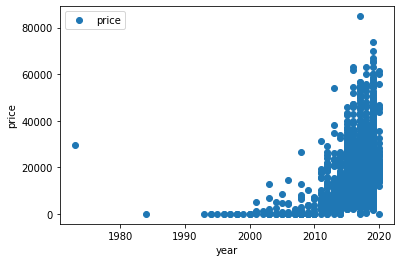

In [ ]:
#Krisha Goti C035
df_ = df.loc[:,['price','year']]

df.plot(x='year',y='price',style='o')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

In [ ]:
#Krisha Goti C035
x= pd.DataFrame(df['year'])
y= pd.DataFrame(df['price'])

In [ ]:
#Krisha Goti C035
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7 ,test_size=0.3, random_state=100)

In [ ]:
#Krisha Goti C035
x_train

,year
1816,2016
751,2016
545,1993
198,2016
1694,2019
...,...
350,2019
1930,2018
79,2019
1859,2019


In [ ]:
#Krisha Goti C035
y_train

,price
1816,5200
751,27500
545,0
198,31009
1694,15300
...,...
350,2800
1930,24190
79,18300
1859,49000


In [ ]:
#Krisha Goti C035
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Krisha Goti C035
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const   -2.864399e+06
year     1.429589e+03
dtype: float64

In [ ]:
#Krisha Goti C035
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     339.7
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.87e-69
Time:                        15:26:27   Log-Likelihood:                -18745.
No. Observations:                1749   AIC:                         3.749e+04
Df Residuals:                    1747   BIC:                         3.751e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.864e+06   1.56e+05    -18.311      0.000   -3.17e+06   -2.56e+06
year        1429.5888     77.566     18.431      0.000    1277.456    1581.722
==============================================================================
Omnibus:                      439.939   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1236.703
Skew:                           1.295   Prob(JB):                    2.84e-269
Kurtosis:                       6.203   Cond. No.                     1.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Linear Regression with Gradient graph

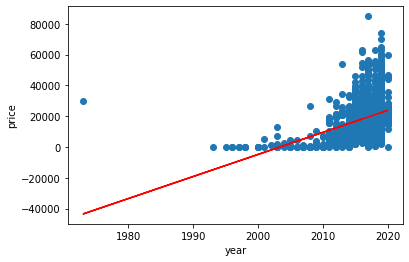

In [ ]:
#Krisha Goti C035
plt.scatter(x_train, y_train)
plt.plot(x_train, -2.864e+06 + 1429.5888*x_train, 'r')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

Apply regression on dataset using Scikit learn library and compute parameters and R2 value.


In [ ]:
#Krisha Goti C035
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

[-2864399.13789519]


In [ ]:
print(regressor.coef_)

[[1429.58877533]]


In [ ]:
#Krisha Goti C035
def calc(slope, intercept, year):
    return slope*year+intercept
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[-2850818.04452957]]


In [ ]:
score = regressor.predict([[9.5]])
print(score)

[[-2850818.04452957]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

      Actual     Predicted
2315   22800  16222.244392
1713   14700  21940.599493
1064   15900  23370.188269
815    30000  21940.599493
1788   18800  19081.421943
...      ...           ...
1823   14700  17651.833167
2324   28000  20511.010718
2432   16800  21940.599493
1677   14600  21940.599493
326    14810  21940.599493

[750 rows x 2 columns]


In [ ]:
#Krisha Goti C035
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 8617.88
Mean squared error: 125125931.92
Root mean squared error: 11185.97


MULTIPLE LINEAR REGRESSION

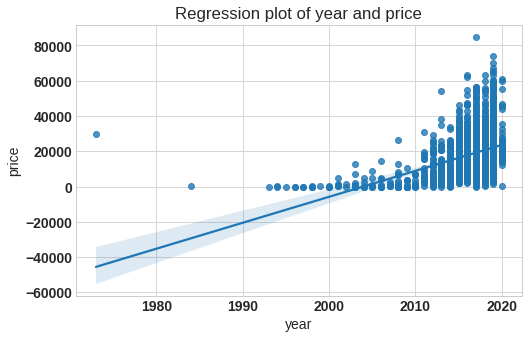

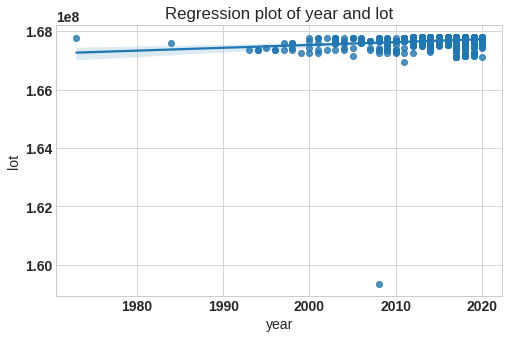

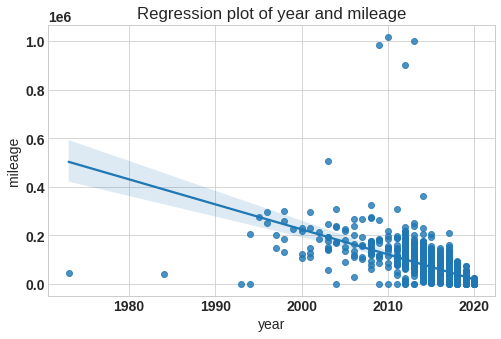

In [ ]:
#Krisha Goti C035
import seaborn as sns # Convention alias for Seaborn

variables = ['price', 'lot', 'mileage']

for var in variables:
    plt.figure()
    sns.regplot(x='year', y=var, data=df).set(title=f'Regression plot of year and {var}');

In [ ]:
from sklearn.metrics import r2_score
print("R-Square Value",r2_score(y_test,y_pred))


R-Square Value 0.20016259308584927


**Question of Curiosity**

Training and testing of the Ridge model(regularization)

In [ ]:
#Krisha Goti C035
from sklearn.linear_model import  Ridge

# lasso regression select initialization
ridge_model = Ridge(alpha = 0.3)

# training the lasso regression model
ridge_model.fit(x_train, y_train)
ridge_predictions = ridge_model.predict(x_test)

In [ ]:
print('R-square score is :', r2_score(y_test, ridge_predictions))

R-square score is : 0.20016213538813876


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


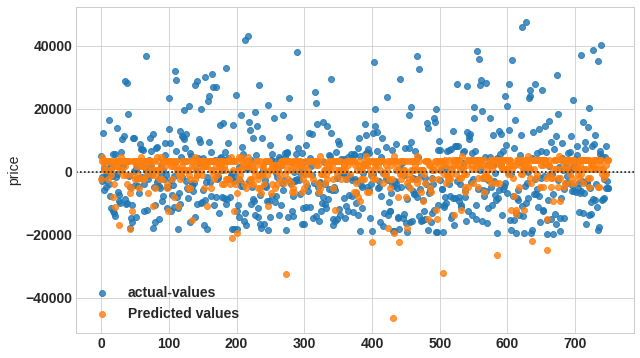

In [ ]:
#Krisha Goti C035
# fitting the size of the plot
plt.figure(figsize=(10, 6))

# plotting the graphs for observed value and real values
sns.residplot([i for i in range(len(y_test))],y_test, label="actual-values")
sns.residplot([i for i in range(len(y_test))],ridge_predictions, label="Predicted values")

# showing the plotting of lasso regression
plt.legend()
plt.show()

Training and testing of the Lasso model(regularization)

In [ ]:
#Krisha Goti C035
from sklearn.linear_model import  Lasso

# lasso regression select initialization
lasso_model = Lasso(alpha=0.9)

# training the lasso regression model
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.9)

In [ ]:
lasso_predictions = lasso_model.predict(x_test)

In [ ]:
print('R-square score is :', r2_score(y_test, lasso_predictions))

R-square score is : 0.20016091279912207


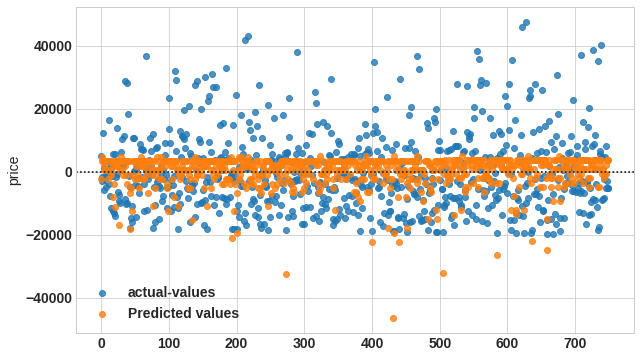

In [ ]:
#Krisha Goti C035
# fitting the size of the plot
plt.figure(figsize=(10, 6))

# plotting the graphs for observed value and real values
sns.residplot([i for i in range(len(y_test))],y_test, label="actual-values")
sns.residplot([i for i in range(len(y_test))],lasso_predictions, label="Predicted values")

# showing the plotting of lasso regression
plt.legend()
plt.show()